# HW 2
## Group 10: *Ben*, **Sara**, *Katy*, **Roy**, *Sukshma*

This is the <ins>notebook</ins> for HW2 aka **Project Part 2**

---

Below is some code:

In [1]:
1 + 1

2

---
## This is the section for the code for a LIF model neuron and its resulting visualizations

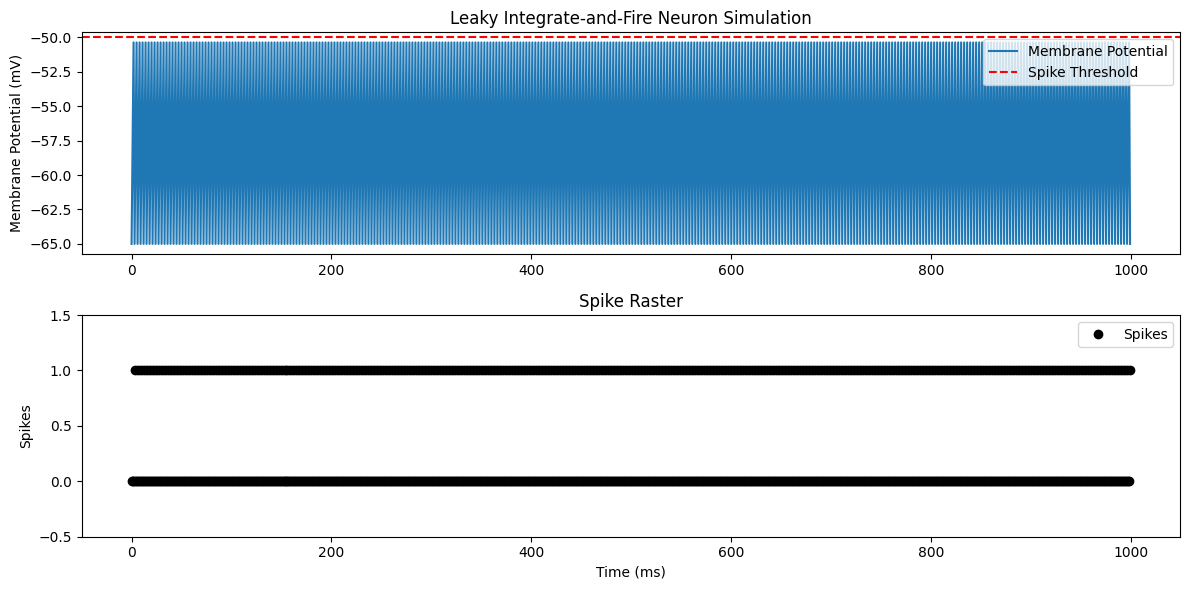

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the leaky integrate-and-fire model
dt = 1.0  # time step (ms)
time = np.arange(0, 1000, dt)  # 1 second simulation
V_rest = -65.0  # resting membrane potential (mV)
V_reset = -65.0  # reset potential (mV)
V_threshold = -50.0  # spike threshold (mV)
R_m = 100.0  # membrane resistance (MΩ)
tau_m = 20.0  # membrane time constant (ms)
I = 1.5  # input current (nA)

# Initialize membrane potential
V_m = np.zeros_like(time)
V_m[0] = V_rest  # start at resting potential

# Simulate the leaky integrate-and-fire model
spikes = np.zeros_like(time)  # array to store spike times
for t in range(1, len(time)):
    # Calculate membrane potential
    dV_m = (-(V_m[t-1] - V_rest) + I * R_m) * (dt / tau_m)
    V_m[t] = V_m[t-1] + dV_m
    
    # Check for spike
    if V_m[t] >= V_threshold:
        spikes[t] = 1  # record spike time
        V_m[t] = V_reset  # reset membrane potential

# Plotting
plt.figure(figsize=(12, 6))

# Membrane potential plot
plt.subplot(2, 1, 1)
plt.plot(time, V_m, label='Membrane Potential')
plt.axhline(y=V_threshold, color='r', linestyle='--', label='Spike Threshold')
plt.title('Leaky Integrate-and-Fire Neuron Simulation')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

# Spike raster plot
plt.subplot(2, 1, 2)
plt.plot(time, spikes, label='Spikes', linestyle='none', marker='o', color='black')
plt.ylim(-0.5, 1.5)
plt.title('Spike Raster')
plt.xlabel('Time (ms)')
plt.ylabel('Spikes')
plt.legend()

plt.tight_layout()
plt.show()

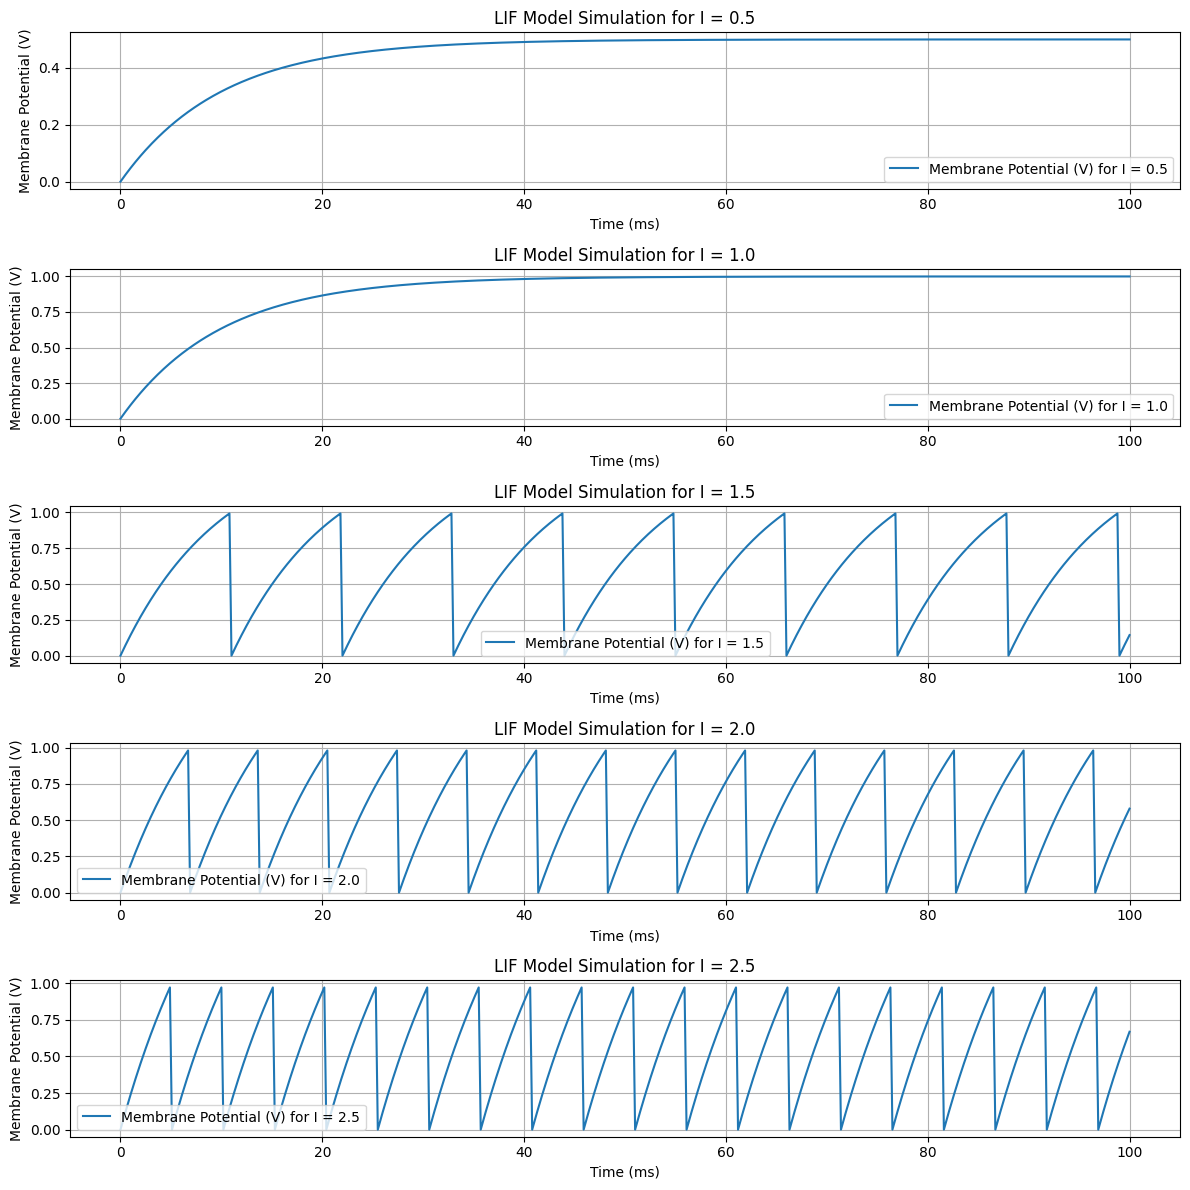

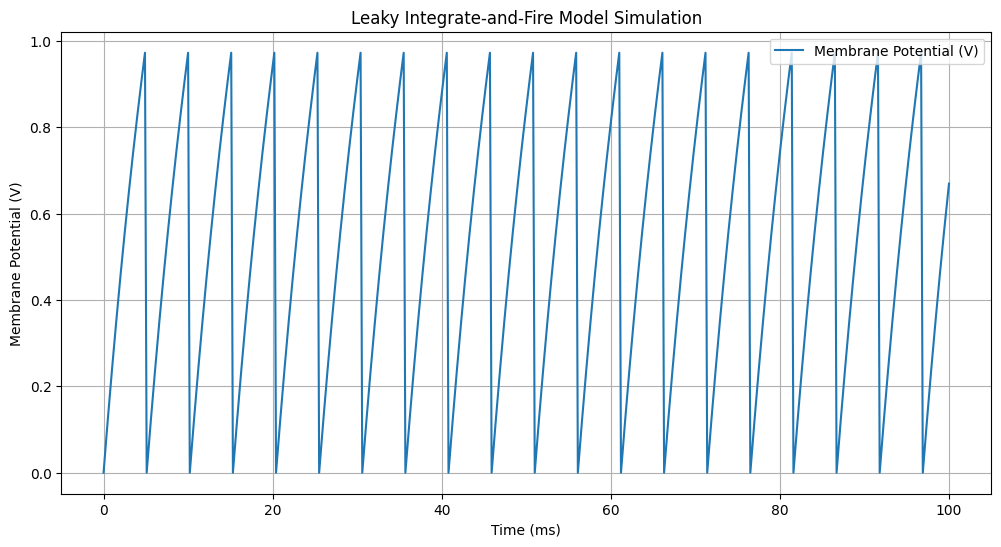

Spike times (ms): [5.1000000000000005, 10.200000000000001, 15.3, 20.400000000000002, 25.5, 30.6, 35.7, 40.800000000000004, 45.900000000000006, 51.0, 56.1, 61.2, 66.3, 71.4, 76.5, 81.60000000000001, 86.7, 91.80000000000001, 96.9]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the LIF model function
def LIF_model(I, duration, dt=0.1, V_rest=0.0, V_threshold=1.0, V_reset=0.0, Rm=1.0, Cm=10.0, V_spike=0.5):
    """
    Simulates the Leaky Integrate-and-Fire model of a neuron.
    
    Parameters:
    I (float): Input current.
    duration (float): Total time to simulate.
    dt (float): Time step of the simulation.
    V_rest (float): Resting membrane potential.
    V_threshold (float): Threshold potential at which the neuron fires.
    V_reset (float): Potential to which membrane potential is reset after a spike.
    Rm (float): Membrane resistance.
    Cm (float): Membrane capacitance.
    V_spike (float): The value to record a spike (for plotting purposes).

    Returns:
    tuple: Tuple containing the time points (array), membrane potential (array), and spike times (array).
    """
    
    # Calculate the number of time steps
    time = np.arange(0, duration+dt, dt)
    n_steps = len(time)
    
    # Initialize the membrane potential array
    V = np.zeros(n_steps)
    V[0] = V_rest  # Set the initial condition
    spikes = []  # List to record spike times
    
    # Simulate the LIF model
    for i in range(1, n_steps):
        # Calculate the membrane potential
        dVdt = (-(V[i-1] - V_rest) + I * Rm) / (Rm * Cm)
        V[i] = V[i-1] + dVdt * dt
        
        # Check for spikes
        if V[i] >= V_threshold:
            spikes.append(time[i])
            V[i-1] = V_spike  # Add a spike for plotting
            V[i] = V_reset  # Reset the membrane potential
        
    return time, V, spikes

# Define simulation parameters
duration = 100  # Total duration of the simulation in ms
dt = 0.1  # Time step in ms
input_currents = [0.5, 1.0, 1.5, 2.0, 2.5]  # Different input currents to test

plt.figure(figsize=(12, 12))

for j, I in enumerate(input_currents):
    # Run the LIF model for each input current
    time, V, spikes = LIF_model(I=I, duration=duration, dt=dt)

    # Create a subplot for each input current
    plt.subplot(len(input_currents), 1, j+1)
    plt.plot(time, V, label=f'Membrane Potential (V) for I = {I}')
    plt.title(f'LIF Model Simulation for I = {I}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (V)')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

# Run the LIF model
time, V, spikes = LIF_model(I=I, duration=duration, dt=dt)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time, V, label='Membrane Potential (V)')
plt.title('Leaky Integrate-and-Fire Model Simulation')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (V)')
plt.grid(True)
plt.legend()
plt.show()

# Print the spike times
print("Spike times (ms):", spikes)


### **Question**: Looking at the above visualization / based on what you know regarding the LIF model – what aspect of this model is most unlike a biological neuron? What is missing?

**Answer**: The models above are most unlike actual neurons in the actual firing on the action potentials. There is no refractory period, meaning each AP begins to fire right after the voltage immediately returns to 0. Additionally, the return to membrane potential is immediate, when in reality, there is a period of repolarization and hyperpolarization (refractory period).

We can also see the role the time constant plays in the above models. In the first figure, the current is 0.5, while for the last figure, the current is 2.5. When the current is smaller, it takes a much longer time for the LIF model to reach threshold, while the opposite is true for when current is greater. 

### **Question**: What was the most challenging aspect of this homework?
**Answer**: The most challenging part of this hw was getting ChatGPT to generate the code to simulate/model the LIF neuron model. We included a failed attempt and the resulting plot first, before getting a section of code that simulated a neuron's spiking that we were happy with. However, the code is still not perfect as it does not account for a refractory period, and the final leaky integrate and fire model simulation plot shows spikes of all the same heights, instead of including some failed intiations as well. 

### **Question**: Estimate how long it took you to complete this homework.
**Answer**: 30-45 min